In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from datetime import datetime
%matplotlib inline
# https://trendeconomy.com/data/h2/China/TOTAL
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)

# Data Scraping

In [2]:
headers = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36',
}
res = requests.get('https://trendeconomy.com/data/h2/China/TOTAL', verify=False, headers=headers).text
soup = bs(res, 'lxml')

C:\Users\USER\miniconda3\envs\venv\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trendeconomy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [3]:
table = soup.select('div.vis-content table')[0]
col_headings = [col.text for col in table.select('thead tr td')]
main_table = [[col.text for col in row.select('td')] for row in table.select('tbody tr')]
row_headings = main_table[0][:3]
main_table

[['TOTAL. ALL COMMODITIES',
  'China',
  'World',
  'Exports',
  'Value (US$)',
  '1,201,646,758,080.00',
  '1,577,763,750,888.00',
  '1,898,388,434,783.00',
  '2,048,782,233,084.00',
  '2,209,007,280,259.00',
  '2,342,292,696,320.00',
  '2,273,468,224,113.00',
  '2,097,637,171,895.00',
  '2,263,370,504,301.00',
  '2,494,230,194,966.00',
  '2,498,569,865,637.00',
  '2,590,600,666,465.00'],
 ['Value Growth, YoY (%)',
  '-16.00',
  '31.30',
  '20.32',
  '7.92',
  '7.82',
  '6.03',
  '-2.93',
  '-7.73',
  '7.90',
  '10.19',
  '0.17',
  '3.68'],
 ['Imports',
  'Value (US$)',
  '1,005,555,225,206.00',
  '1,396,001,565,258.00',
  '1,743,394,866,363.00',
  '1,818,199,227,571.00',
  '1,949,992,314,705.00',
  '1,959,234,625,162.00',
  '1,679,564,324,560.00',
  '1,587,920,688,162.00',
  '1,843,792,938,795.00',
  '2,134,982,614,989.00',
  '2,068,950,254,597.00',
  '2,055,590,611,924.00'],
 ['Value Growth, YoY (%)',
  '-11.21',
  '38.82',
  '24.88',
  '4.29',
  '7.24',
  '0.47',
  '-14.27',
  '-5.

In [4]:
col_headings

['Commodity',
 'Reporter',
 'Partner',
 'Trade flow',
 'Indicator',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

# Question A

In [5]:
# subprocess.Popen(r'C:\Users\USER\Downloads\service_manufacturing_value_added.xlsx', shell=True)

In [6]:
df = pd.read_excel(r"C:\Users\USER\OneDrive\桌面\Y2S1\International Economics\new_topic\Data_Extract_From_World_Development_Indicators (5).xlsx", index_col=0)
df
df = df.query("`Series Name` == 'Manufacturing, value added (% of GDP)' | `Series Name` == 'Services, value added (% of GDP)'")
df = df.T
columns = pd.MultiIndex.from_product([['Australia', 'China'], ['manufacturing value added, % of GDP', 'service value added, % of GDP']])
df1 = pd.DataFrame(df.iloc[3:, :].values, index=df.iloc[3:, :].index, columns=columns)
df1.index.name = 'Years'
df1.index = df1.index.str.replace('(\s\[.+\])', '', regex=True)
idx = pd.IndexSlice
for country in ['Australia', 'China']:
    for cal in ['manufacturing value added, % of GDP', 'service value added, % of GDP']:
        df1.loc[:, idx[country, cal]]= df1[country][cal].apply(lambda x: float(x) if x != '..' else np.nan)
pd.set_option('display.max_rows', 100)
df1.to_clipboard(excel=True)

In [7]:
df1.pct_change() * 100

Australia                                \
      manufacturing value added, % of GDP service value added, % of GDP   
Years                                                                     
1972                                  NaN                           NaN   
1973                                  NaN                           NaN   
1974                                  NaN                           NaN   
1975                                  NaN                           NaN   
1976                                  NaN                           NaN   
1977                                  NaN                           NaN   
1978                                  NaN                           NaN   
1979                                  NaN                           NaN   
1980                                  NaN                           NaN   
1981                                  NaN                           NaN   
1982                                  NaN                           NaN   
1983                                  NaN                           NaN   
1984                                  NaN                           NaN   
1985                                  NaN                           NaN   
1986                                  NaN                           NaN   
1987                                  NaN                           NaN   
1988                                  NaN                           NaN   
1989                                  NaN                           NaN   
1990                                  NaN                           NaN   
1991                            -8.871129                      2.938876   
1992                             0.082330                      1.052719   
1993                             2.329263                      1.076167   
1994                             2.577731                     -0.054245   
1995                            -0.616001                     -0.148244   
1996                            -2.905135                      0.079029   
1997                            -3.443232                      1.528578   
1998                             1.357988                      0.266077   
1999                            -4.153048                      1.183670   
2000                            -3.201886                      0.033526   
2001                            -4.987866                     -0.319352   
2002                            -3.981299                     -0.310023   
2003                             2.906782                      0.515446   
2004                             0.184007                     -0.037035   
2005                            -5.029286                      0.125052   
2006                            -4.284441                     -1.015803   
2007                            -6.079664                      0.956486   
2008                            -0.952220                      0.223313   
2009                            -8.135796                     -0.608390   
2010                            -5.400025                      2.529303   
2011                            -7.859427                     -1.619548   
2012                            -4.316455                      0.829222   
2013                            -6.270821                      1.670436   
2014                            -3.627217                     -0.851602   
2015                            -1.077737                      2.350791   
2016                            -3.404734                      1.473890   
2017                            -4.712216                     -1.768948   
2018                            -0.370178                     -0.533147   
2019                            -2.806753                     -0.888917   
2020                             0.641058                      0.327092   
2021                             0.000000                      0.000000   

                                    China               

### China average growth from 1984 - 2020

In [8]:
china_sva_values = df1.loc['1984':, idx['China', 'service value added, % of GDP']]
china_sva_changes = china_sva_values.pct_change() * 100
china_sva_changes.mean()

2.1181375873163093

### Australia average growth from 1990 - 2020

In [9]:
aus_sva_values = df1.loc['1990':, idx['Australia', 'service value added, % of GDP']]
aus_sva_changes = aus_sva_values.pct_change() * 100
aus_sva_changes.mean()

0.35498129290577646

## Manufacturing Value Added

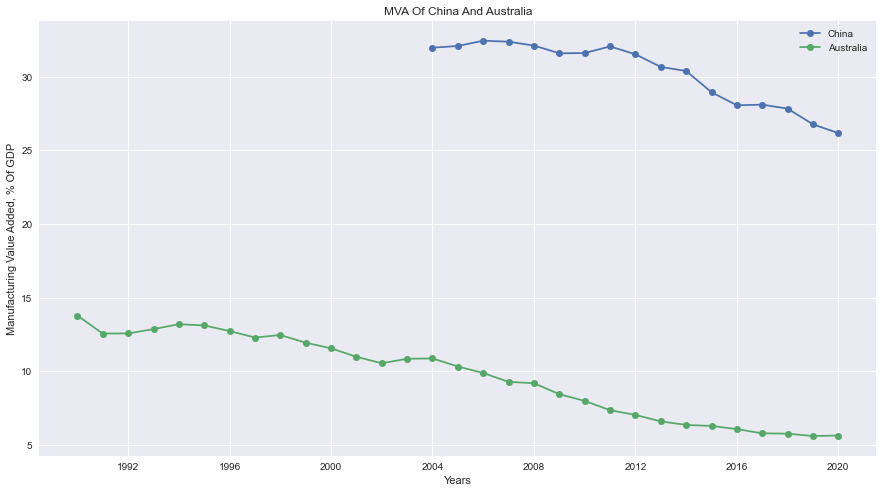

In [10]:
china_MVA = df1.loc[:, idx['China', 'manufacturing value added, % of GDP']].values
aus_MVA = df1.loc[:, idx['Australia', 'manufacturing value added, % of GDP']].values
years = pd.to_datetime(df1.index.values)
fig, ax = plt.subplots(figsize=(15, 8))
values = {
    'xlabel' : 'Years',
    'ylabel' : 'manufacturing value added, % of '.title() + "GDP",
    'title'  : "MVA " + 'of China And Australia'.title()
}
ax.plot(years, china_MVA, marker='o');
ax.plot(years, aus_MVA, marker='o');
ax.legend(['China', 'Australia'], loc='best');
ax.set(**values);

## Service Value Added

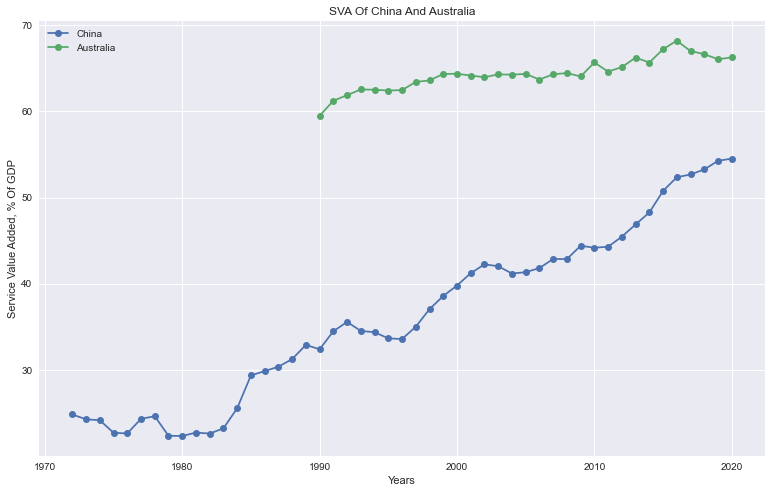

In [11]:
china_SVA = df1.loc[:, idx['China', 'service value added, % of GDP']].values
aus_SVA = df1.loc[:, idx['Australia', 'service value added, % of GDP']].values
fig, ax = plt.subplots(figsize=(13, 8))
values = {
    'xlabel' : 'Years',
    'ylabel' : 'service value added, % of '.title() + 'GDP',
    'title'  : "SVA " + 'of China And Australia'.title()
}
ax.plot(years, china_SVA, marker='o');
ax.plot(years, aus_SVA, marker='o');
ax.legend(['China', 'Australia'], loc='best');
ax.set(**values);
plt.savefig('SVA.png', bbox_inches='tight');

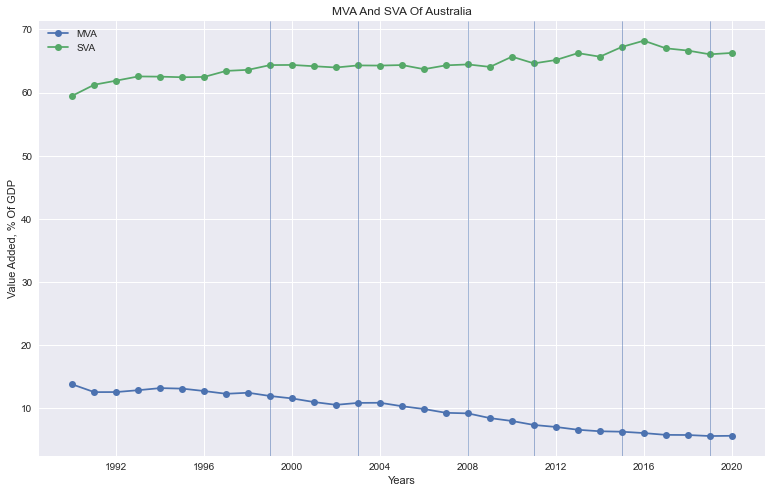

In [12]:
aus_MVA = df1.loc[:, idx['Australia', 'manufacturing value added, % of GDP']].values
aus_SVA = df1.loc[:, idx['Australia', 'service value added, % of GDP']].values
fig, ax = plt.subplots(figsize=(13, 8))
values = {
    'xlabel' : 'Years',
    'ylabel' : 'value added, % of '.title() + 'GDP',
    'title'  : "MVA And SVA " + 'of Australia'.title()
}
ax.plot(years, aus_MVA, marker='o');
ax.plot(years, aus_SVA, marker='o');
ax.legend(['MVA', 'SVA'], loc='best');
ax.set(**values);
ax.axvline(datetime(2015, 1, 1), linewidth=0.5)
ax.axvline(datetime(1999, 1, 1), linewidth=0.5)
ax.axvline(datetime(2008, 1, 1), linewidth=0.5)
ax.axvline(datetime(2003, 1, 1), linewidth=0.5)
ax.axvline(datetime(2011, 1, 1), linewidth=0.5)
ax.axvline(datetime(2019, 1, 1), linewidth=0.5)
plt.savefig('SVA_aus.png', bbox_inches='tight');

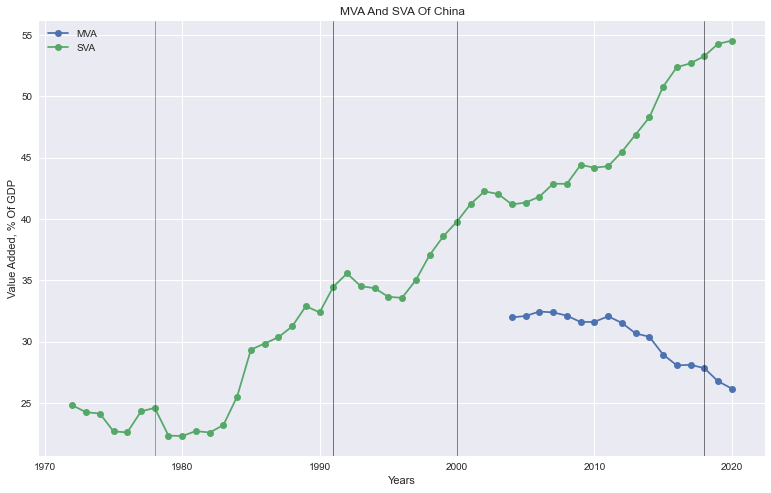

In [13]:
china_MVA = df1.loc[:, idx['China', 'manufacturing value added, % of GDP']].values
china_SVA = df1.loc[:, idx['China', 'service value added, % of GDP']].values
fig, ax = plt.subplots(figsize=(13, 8))
values = {
    'xlabel' : 'Years',
    'ylabel' : 'value added, % of '.title() + 'GDP',
    'title'  : "MVA And SVA " + 'of China'.title()
}
ax.plot(years, china_MVA, marker='o');
ax.plot(years, china_SVA, marker='o');
ax.legend(['MVA', 'SVA'], loc='best');
ax.set(**values);
ax.axvline(datetime(1978, 1, 1), color='red', linewidth=0.5)
ax.axvline(datetime(1991, 1, 1), color='black', linewidth=0.5)
ax.axvline(datetime(2000, 1, 1), color='black', linewidth=0.5)
ax.axvline(datetime(2018, 1, 1), color='black', linewidth=0.5)
plt.savefig('SVA.png', bbox_inches='tight');


## Terms Of Trade

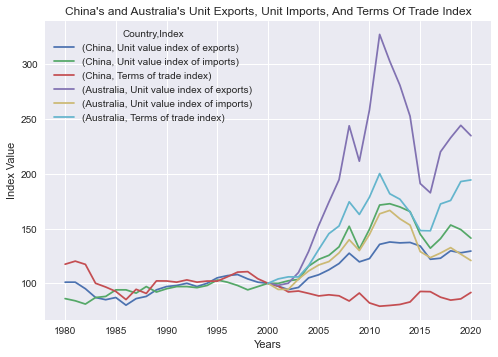

In [14]:
df2 = pd.read_excel(r"C:\Users\USER\OneDrive\桌面\Y2S1\International Economics\new_topic\us_termsoftrade_85052196163774.xlsx", skiprows=list(range(4)) + [5])
df2.rename(columns={
    'Unnamed: 0'  : 'Country',
    'YEAR' : 'Index'
}, inplace=True)
df2 = df2.set_index(['Country', 'Index']).T
df2.index = pd.to_datetime(df2.index.values).year
final_df2 = df2.loc[:, idx[:, ['Unit value index of exports', 'Unit value index of imports', 'Terms of trade index']]].T.reset_index(level=1)
final_df2.rename(str.strip, axis=0, inplace=True)
final_df2.reset_index(inplace=True)
china_TOT = final_df2.query('Country == "China"').set_index(['Country', 'Index'])
aus_TOT = final_df2.query('Country == "Australia"').set_index(['Country', 'Index'])
TOT = pd.concat([china_TOT, aus_TOT]).T
TOT = TOT.replace('..', np.nan, regex=True)
TOT.plot(title="China's and Australia's Unit Exports, Unit Imports, And Terms Of Trade Index", xlabel='Years', ylabel='Index Value');
# TOT

In [15]:
TOT = TOT.T

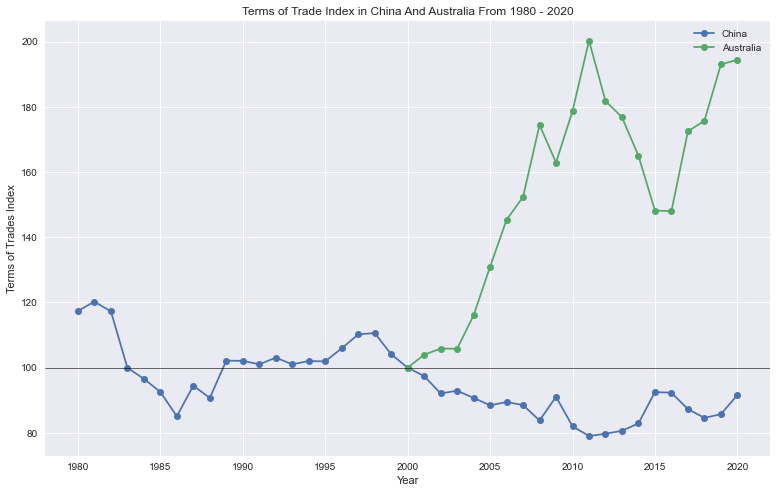

In [16]:
fig, ax = plt.subplots(figsize=(13, 8))
aus_TOT = aus_TOT.replace('..', np.nan,regex=True)
ax.plot(TOT.columns, china_TOT.loc[idx['China', 'Terms of trade index'], :], marker='o');       # china
ax.plot(TOT.columns, aus_TOT.loc[idx['Australia', 'Terms of trade index'], :], marker='o');  # aus
values = {
    'xlabel' : 'Year',
    'ylabel' : 'Terms of Trades Index',
    'title'  : 'Terms of Trade Index in China And Australia From 1980 - 2020'
}
ax.legend(['China', 'Australia'], loc='best')
ax.axhline(100, color='black', linewidth=0.6);
ax.set(**values);

## Trade Openness

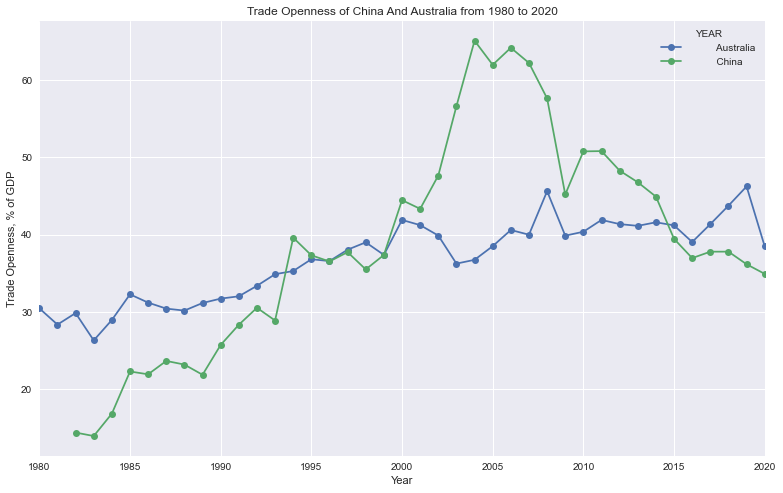

In [17]:
df3 = pd.read_excel(r'C:\Users\USER\OneDrive\桌面\Y2S1\International Economics\new_topic\Trade Openness (Australia).xlsx', skiprows=range(4)).drop(0).set_index('YEAR')
df3 = df3.T
for country in df3.columns:
    df3[country] = df3[country].apply(lambda x: float(x) if x != '-' else np.nan)
df3.index = pd.to_datetime(df3.index.values)
df3.plot(title='Trade Openness of China And Australia from 1980 to 2020', xlabel='Year', ylabel='Trade Openness, % of GDP', figsize=(13, 8), marker='o');
plt.savefig('trade_openness.png')

In [18]:
df3

YEAR,Australia,China
1980-01-01,30.464203,NaN
1981-01-01,28.362330,NaN
1982-01-01,29.849035,14.401260
1983-01-01,26.318814,13.951643
1984-01-01,28.958455,16.846905
1985-01-01,32.273037,22.297599
1986-01-01,31.202931,21.933778
1987-01-01,30.426824,23.662471
1988-01-01,30.173034,23.191833
1989-01-01,31.153928,21.874050


In [19]:
df3.loc[['2001' ,'2004'], df3.columns[-1]]

2001-01-01    43.328364
2004-01-01    65.071998
Name:           China, dtype: float64

In [20]:
df3.loc['1999', df3.columns[-1]].values[0] /  df3.loc['1982', df3.columns[-1]].values[0]

2.5944510428968615

In [21]:
(df3.pct_change() * 100).mean()

YEAR
          Australia    0.793557
          China        2.995850
dtype: float64

# Question B

## Manufacturing and Service Value Added Changes

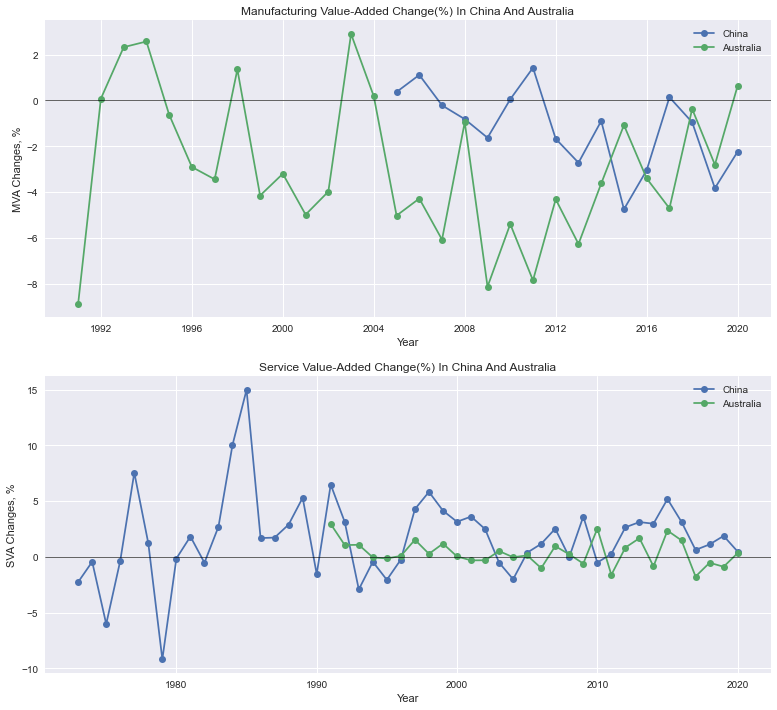

In [22]:
MVA_SVA_changes = (df1.pct_change() * 100).drop('2021', axis=0)
MVA_SVA_changes.index = pd.to_datetime(MVA_SVA_changes.index.values)
fig, ax = plt.subplots(2, 1, figsize=(13, 12))

xlabel = 'Year'
MVA_params = {
    'xlabel' : xlabel,
    'ylabel' : 'MVA Changes, %',
    'title'  : 'Manufacturing Value-Added Change(%) In China And Australia'
}

SVA_params = {
    'xlabel' : xlabel,
    'ylabel' : 'SVA Changes, %',
    'title'  : 'Service Value-Added Change(%) In China And Australia'
}

ax1 = ax[0]
ax1.plot(MVA_SVA_changes.loc[:, idx['China', 'manufacturing value added, % of GDP']], marker='o');
ax1.plot(MVA_SVA_changes.loc[:, idx['Australia', 'manufacturing value added, % of GDP']],marker='o');
ax1.legend(['China', 'Australia'])
ax1.set(**MVA_params)
ax1.axhline(0, color='black', linewidth=0.6);

ax2 = ax[1]
ax2.plot(MVA_SVA_changes.loc[:, idx['China', 'service value added, % of GDP']], marker='o');
ax2.plot(MVA_SVA_changes.loc[:, idx['Australia', 'service value added, % of GDP']], marker='o');
ax2.legend(['China', 'Australia'])
ax2.set(**SVA_params);
ax2.axhline(0, color='black', linewidth=0.6);
plt.savefig(r'SVA.png');

In [23]:
MVA_SVA_changes.loc[:, idx[['Australia', 'China'], 'service value added, % of GDP']].corr()

,,Australia,China
,,"service value added, % of GDP","service value added, % of GDP"
Australia,"service value added, % of GDP",1.000000,0.337449
China,"service value added, % of GDP",0.337449,1.000000


## Terms of Trade Changes

In [24]:
TOT = TOT.T

In [25]:
TOT_changes = (TOT.pct_change() * 100).dropna(axis=0)
TOT_changes.index = pd.to_datetime(TOT_changes.index, format='%Y')

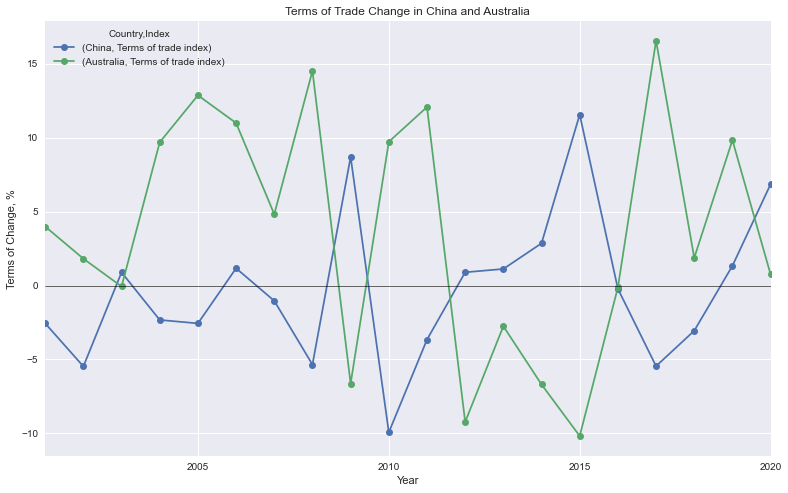

In [26]:
fig, ax = plt.subplots(figsize=(16, 18))
TOT_changes.loc[:, idx[:, 'Terms of trade index']].plot(ax=ax, xlabel=xlabel, ylabel='Terms of Change, %', figsize=(13, 8), title='Terms of Trade Change in China and Australia', marker='o');
ax.axhline(0, color='black', linewidth=0.6);

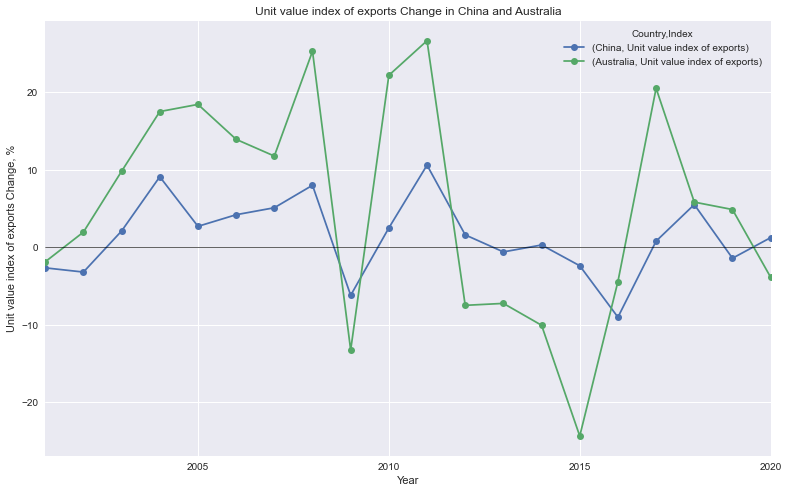

In [27]:
fig, ax = plt.subplots(figsize=(16, 18))
TOT_changes.loc[:, idx[:, 'Unit value index of exports']].plot(ax=ax,xlabel=xlabel, ylabel='Unit value index of exports Change, %', figsize=(13, 8), title='Unit value index of exports Change in China and Australia', marker='o');
ax.axhline(0, color='black', linewidth=0.6);

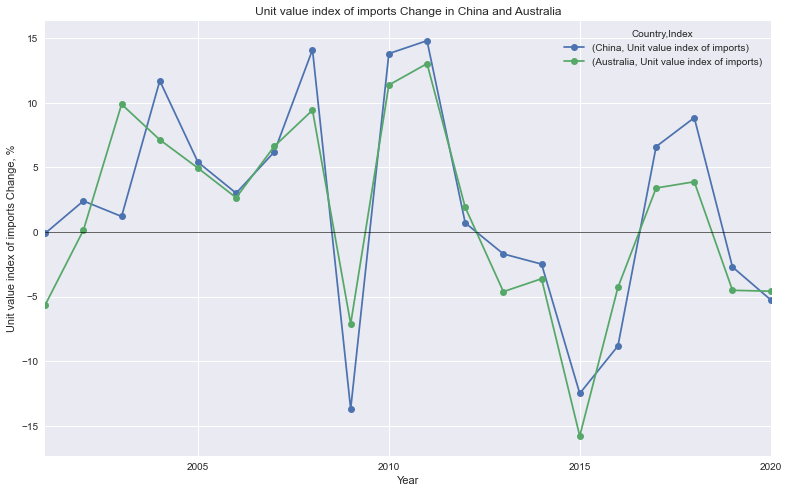

In [28]:
fig, ax = plt.subplots(figsize=(16, 18))
TOT_changes.loc[:, idx[:, 'Unit value index of imports']].plot(ax=ax,xlabel=xlabel, ylabel='Unit value index of imports Change, %', figsize=(13, 8), title='Unit value index of imports Change in China and Australia', marker='o');
ax.axhline(0, color='black', linewidth=0.6);

## Trade Openness Changes

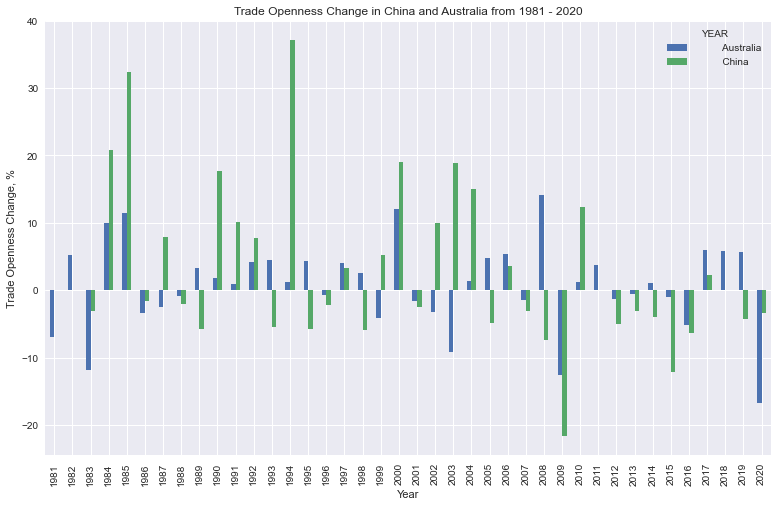

In [29]:
trade_openness_changes = (df3.pct_change() * 100).dropna(axis=0, thresh=1)
toc_copy = trade_openness_changes.copy()
toc_copy.index = pd.to_datetime(toc_copy.index.values, format='%Y').year
toc_copy.plot(xlabel=xlabel, ylabel='Trade Openness Change, %', title='Trade Openness Change in China and Australia from 1981 - 2020', figsize=(13, 8), kind='bar');

In [30]:
toc_copy

YEAR,Australia,China
1981,-6.899486,NaN
1982,5.241829,NaN
1983,-11.826916,-3.122066
1984,10.029480,20.752119
1985,11.445993,32.354276
1986,-3.315790,-1.631660
1987,-2.487289,7.881421
1988,-0.834100,-1.988967
1989,3.250896,-5.682098
1990,1.817154,17.632084


## Effect of a change in the terms of trade and trade openness on MVA and SVA growth

### China

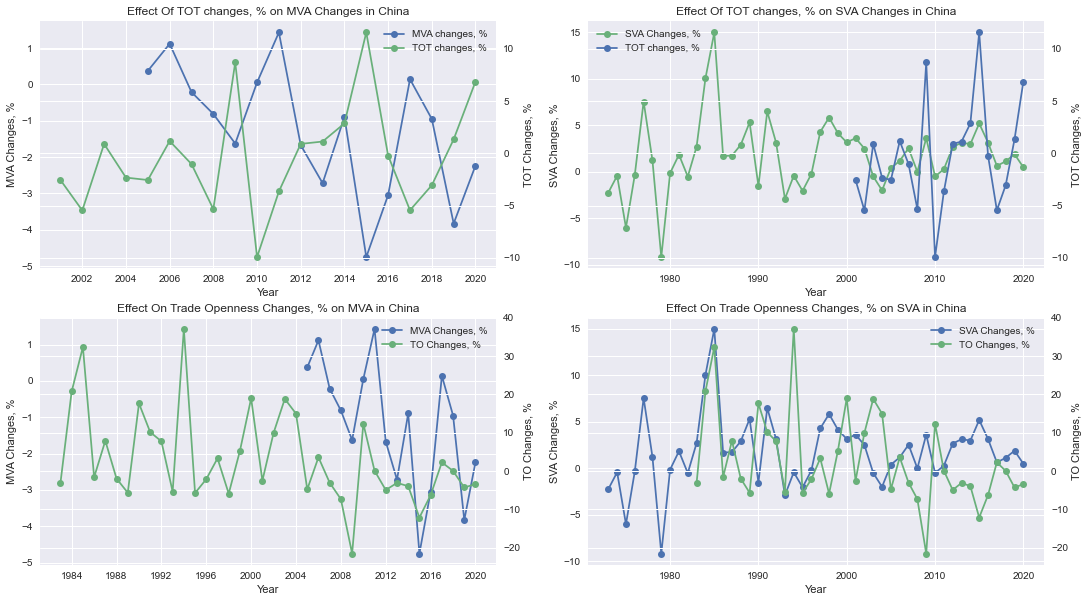

In [31]:
color = '#69b07a'
china_MVA_changes = MVA_SVA_changes.loc[:, idx['China', ['manufacturing value added, % of GDP']]]
china_SVA_changes = MVA_SVA_changes.loc[:, idx['China', 'service value added, % of GDP']]
china_TOT_changes = TOT_changes.loc[:, idx['China', "Terms of trade index"]]
fig, ax = plt.subplots(2,2, figsize=(18, 10), sharex=False)
ax1 = ax[0, 0]
plot_upper_left_1 = ax1.plot(china_MVA_changes, marker='o')
ax1_2 = ax1.twinx()
plot_upper_left_2 = ax1_2.plot(china_TOT_changes, marker='o', color=color);
ax1_params = {
    'title' : 'Effect Of TOT changes, % on MVA Changes in China',
    'ylabel' : 'MVA Changes, %',
    'xlabel' : xlabel,
}

ax1.set(**ax1_params)
ax1_2.set_ylabel('TOT Changes, %')
upper_left = plot_upper_left_1 + plot_upper_left_2
plt.legend(upper_left, ['MVA changes, %', 'TOT changes, %'], loc='best');


ax2 = ax[0, 1]
plot_upper_right_1 = ax2.plot(china_SVA_changes, marker='o', color='#69b07a')
ax2_2 = ax2.twinx()
plot_upper_right_2 = ax2_2.plot(china_TOT_changes, marker='o');
ax2_params = {
    'title' : 'Effect Of TOT changes, % on SVA Changes in China',
    'ylabel' : 'SVA Changes, %',
    'xlabel' : xlabel
}

ax2.set(**ax2_params)
ax2_2.set_ylabel('TOT Changes, %')
upper_right = plot_upper_right_1 + plot_upper_right_2
plt.legend(upper_right, ['SVA Changes, %', 'TOT changes, %'], loc='best');


ax3 = ax[1, 0]
ax3_2 = ax3.twinx()
china_trade_openness_changes = trade_openness_changes[trade_openness_changes.columns[1]]
plot_lower_left_1 = ax3.plot(china_MVA_changes, marker='o');
plot_lower_left_2 = ax3_2.plot(china_trade_openness_changes, marker='o', color=color);
lower_left = plot_lower_left_1 + plot_lower_left_2
plt.legend(lower_left, ['MVA Changes, %', 'TO Changes, %']);
ax3_params = {
    'title' : 'Effect On Trade Openness Changes, % on MVA in China',
    'ylabel' : 'MVA Changes, %',
    'xlabel' : xlabel
}
ax3_2.set_ylabel('TO Changes, %')
ax3.set(**ax3_params)

ax4 = ax[1, 1]
ax4_2 = ax4.twinx()
plot_lower_right_1 = ax4.plot(china_SVA_changes, marker='o');
plot_lower_right_2 = ax4_2.plot(china_trade_openness_changes, marker='o', color=color);
plot_lower_right = plot_lower_right_1 + plot_lower_right_2
plt.legend(plot_lower_right, ['SVA Changes, %', 'TO Changes, %']);
ax4_params = {
    'title'  : 'Effect On Trade Openness Changes, % on SVA in China',
    'ylabel' : 'SVA Changes, %',
    'xlabel' : xlabel
}
ax4_2.set_ylabel('TO Changes, %')
ax4.set(**ax4_params);

plt.savefig('corr_china.png', bbox_inches='tight');

## Australia

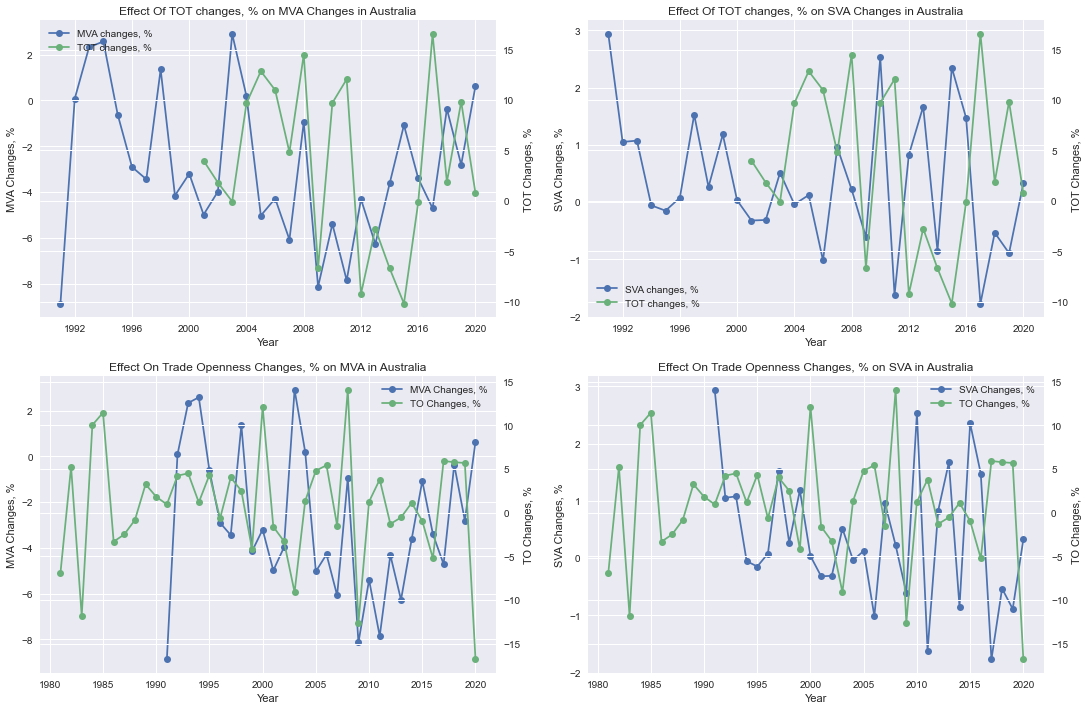

In [32]:
aus_MVA_changes = MVA_SVA_changes.loc[:, idx['Australia', ['manufacturing value added, % of GDP']]]
aus_SVA_changes = MVA_SVA_changes.loc[:, idx['Australia', 'service value added, % of GDP']]
aus_TOT_changes = TOT_changes.loc[:, idx['Australia', "Terms of trade index"]]
fig, ax = plt.subplots(2,2, figsize=(18, 12), sharex=False)
ax1 = ax[0, 0]
ax1_2 = ax1.twinx()
plot_upper_left_1 = ax1.plot(aus_MVA_changes, marker='o')
plot_upper_left_2 = ax1_2.plot(aus_TOT_changes, marker='o', color=color);
plot_upper_left = plot_upper_left_1 + plot_upper_left_2
plt.legend(plot_upper_left, ['MVA changes, %', 'TOT changes, %']);
ax1_params = {
    'title' : 'Effect Of TOT changes, % on MVA Changes in Australia',
    'ylabel': 'MVA Changes, %',
    'xlabel' : xlabel,
}
ax1.set(**ax1_params)
ax1.axhline(0, linewidth=0.5, color='black')
ax1_2.set_ylabel('TOT Changes, %')

ax2 = ax[0, 1]
ax2_2 = ax2.twinx()
plot_upper_right_1 = ax2.plot(aus_SVA_changes, marker='o')
plot_upper_right_2 = ax2_2.plot(aus_TOT_changes, marker='o', color=color);
plot_upper_right = plot_upper_right_1  + plot_upper_right_2
ax2_params = {
    'title' : 'Effect Of TOT changes, % on SVA Changes in Australia',
    'ylabel' : 'SVA Changes, %',
    'xlabel' : xlabel
}
ax2.set(**ax2_params)
ax2_2.set_ylabel('TOT Changes, %')
plt.legend(plot_upper_right, ['SVA changes, %', 'TOT changes, %'], loc='lower left');

ax3 = ax[1, 0]
ax3_2 = ax3.twinx()
aus_trade_openness_changes = trade_openness_changes[trade_openness_changes.columns[0]]
plot_lower_left_1 = ax3.plot(aus_MVA_changes, marker='o');
plot_lower_left_2 = ax3_2.plot(aus_trade_openness_changes, marker='o', color=color);
plot_lower_left = plot_lower_left_1 + plot_lower_left_2
plt.legend(plot_lower_left, ['MVA Changes, %', 'TO Changes, %']);
ax3_params = {
    'title' : 'Effect On Trade Openness Changes, % on MVA in Australia',
    'ylabel' : 'MVA Changes, %',
    'xlabel' : xlabel
}
ax3.set(**ax3_params)
ax3_2.set_ylabel('TO Changes, %')

ax4 = ax[1, 1]
ax4_2 = ax4.twinx()
plot_lower_right_1 = ax4.plot(aus_SVA_changes, marker='o');
plot_lower_right_2 = ax4_2.plot(aus_trade_openness_changes, marker='o', color=color);
plot_lower_right = plot_lower_right_1 + plot_lower_right_2
plt.legend(plot_lower_right, ['SVA Changes, %', 'TO Changes, %']);
ax4_params = {
    'title' : 'Effect On Trade Openness Changes, % on SVA in Australia',
    'ylabel' : 'SVA Changes, %',
    'xlabel' : xlabel
}
ax4.set(**ax4_params);
ax4_2.set_ylabel('TO Changes, %');
plt.savefig('corr_aus.png', bbox_inches='tight');